In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer, PowerTransformer

c:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


# General analysis on the data

In [4]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

(None,
                AB            AF           AH          AM          AR  \
 count  617.000000    617.000000   617.000000  617.000000  617.000000   
 mean     0.477149   3502.013221   118.624513   38.968552   10.128242   
 std      0.468388   2300.322717   127.838950   69.728226   10.518877   
 min      0.081187    192.593280    85.200147    3.177522    8.138688   
 25%      0.252107   2197.345480    85.200147   12.270314    8.138688   
 50%      0.354659   3120.318960    85.200147   20.533110    8.138688   
 75%      0.559763   4361.637390   113.739540   39.139886    8.138688   
 max      6.161666  28688.187660  1910.123198  630.518230  178.943634   
 
                AX          AY          AZ           BC           BD   ...  \
 count  617.000000  617.000000  617.000000   617.000000    617.000000  ...   
 mean     5.545576    0.060320   10.566447     8.053012   5350.388655  ...   
 std      2.551696    0.416817    4.350645    65.166943   3021.326641  ...   
 min      0.699861    

The dataset I've chosen has 58 columns, among which 3 are categorical (EJ, Id, Class) and the other ones are numerical of type float. $'Class'\in\{0,1\}$ is the target variable.  <br>
The probelm is then a binary classification problem. 
The numerical attributes (columns) take values in very different ranges and they are 55. I will drop 'Id' after checking for duplicates since it's not a meaningful attribute, .

Target variable distribution:

In [8]:
print(Counter(data['Class']))
print("Class ratio: ", np.bincount(data['Class'])[0]/np.bincount(data['Class'])[1])

Counter({0: 509, 1: 108})
Class ratio:  4.712962962962963


The classes are unbalanced with 0 that is almost 5 times 1.

Missing values:

In [6]:
missings=data.isnull().sum()
print("Columns with missing values:\n",missings[missings>0])

Columns with missing values:
 BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64


Total number of missing values:

In [6]:
data.isna().sum().sum()

131

Total number of rows with at least one missing value:

In [7]:
data.isna().any(axis=1).sum()

69

In [8]:
len(data[data.BQ.isna() & data.EL.isna()])  #EL and BQ have 60 missings each, among which in 53 cases they are both missing

53

Missing values stratifying by class:

In [7]:
missings1=data[data.Class==1].isnull().sum()
missings0=data[data.Class==0].isnull().sum()
print(missings1[missings1>0])
print(missings0[missings0>0])

CC    1
EL    6
FC    1
FS    1
dtype: int64
BQ    60
CB     2
CC     2
DU     1
EL    54
FL     1
FS     1
GL     1
dtype: int64


Checking if there are duplicates using 'Id' column:

In [10]:
len(data.Id.unique())==len(data)

True

# Features distribution

In [3]:
numerical_f=list(data.select_dtypes(include=["float64"]).columns)

Inspecting the distribution of each feature:

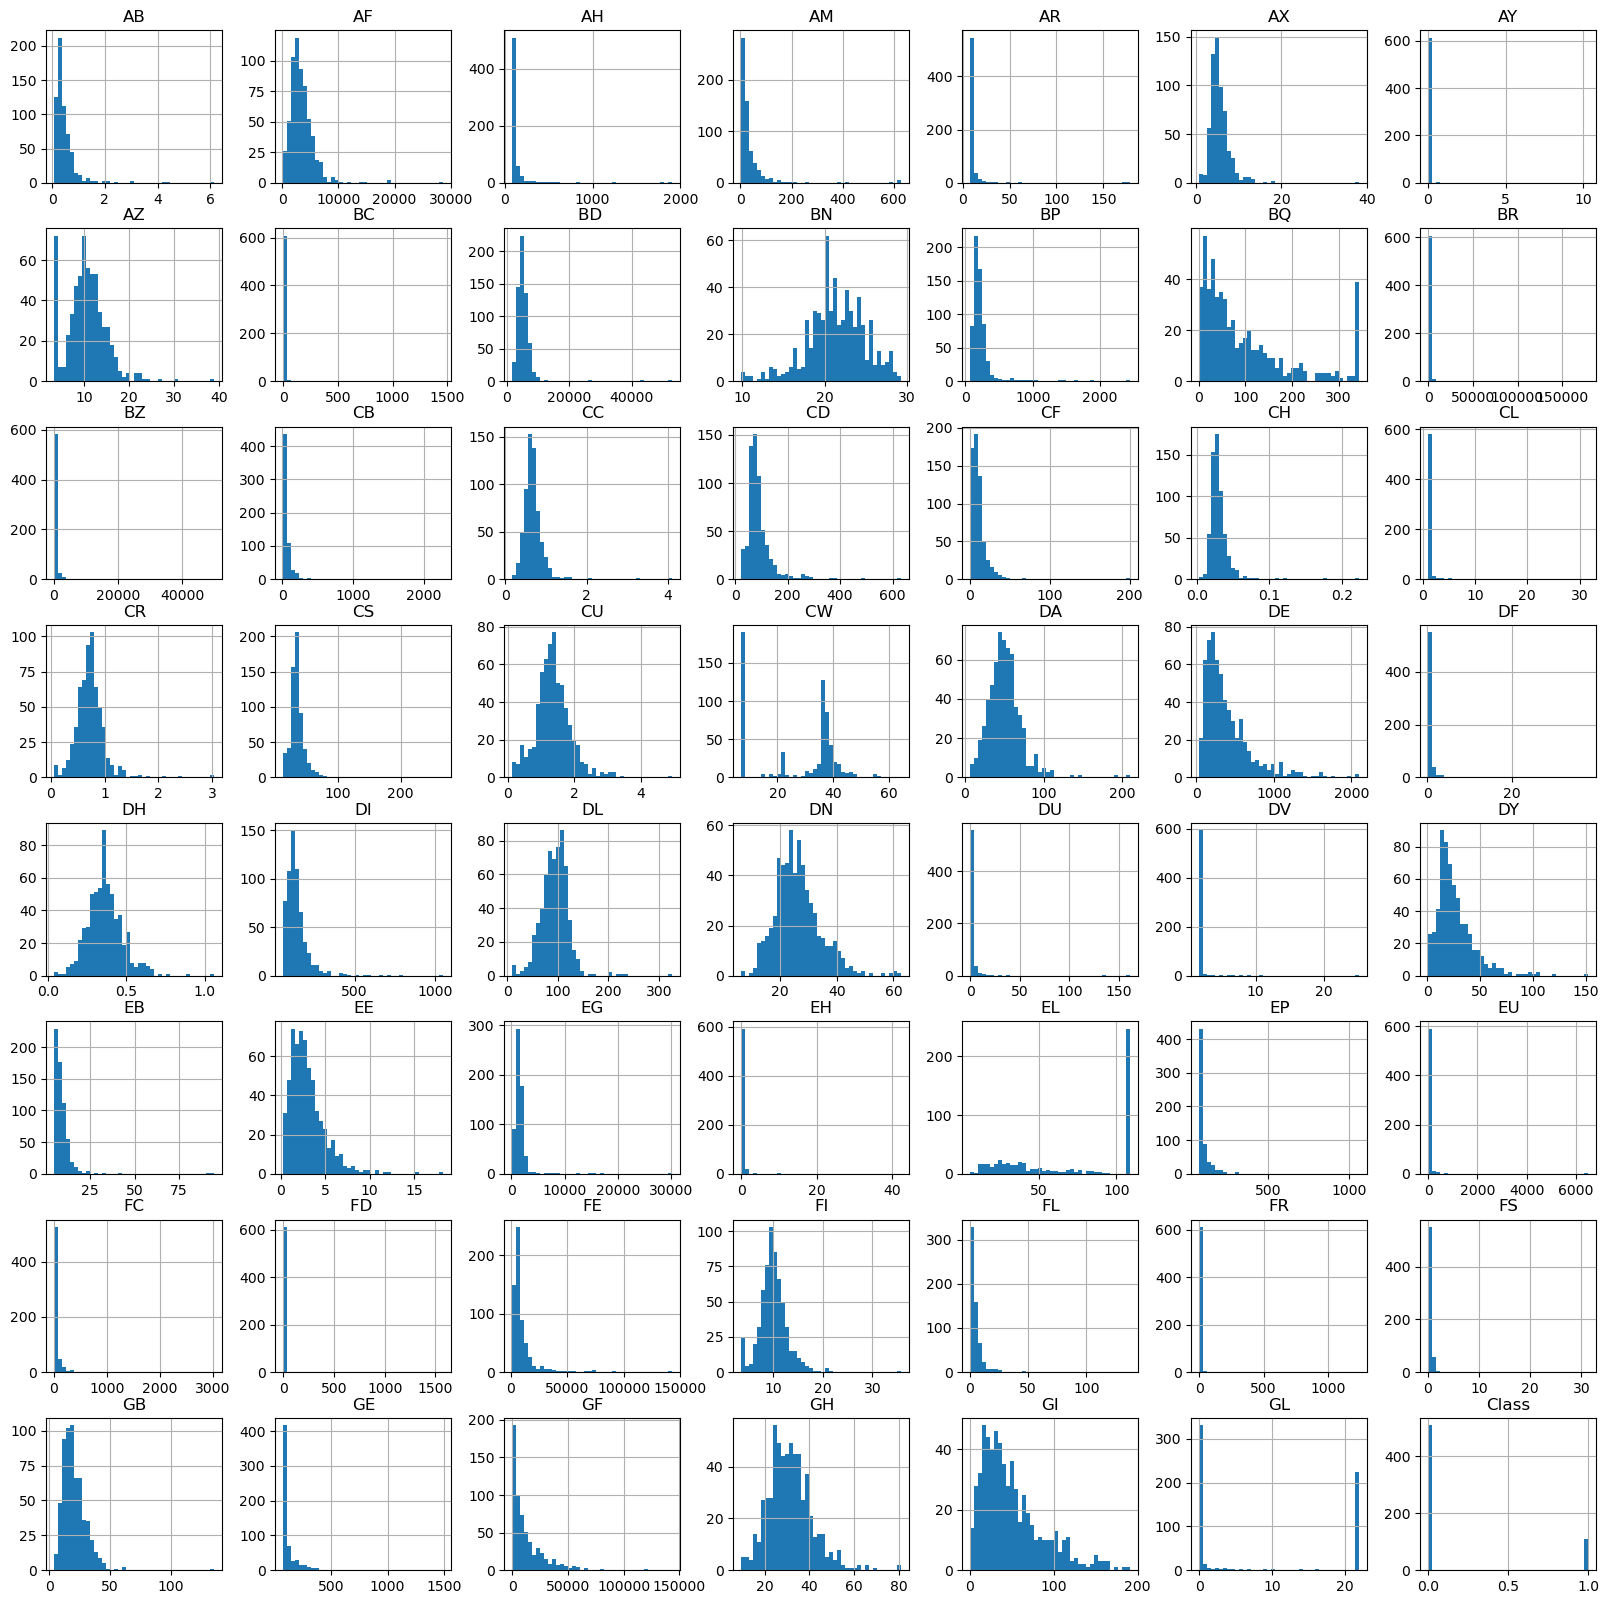

In [4]:
data.hist(bins=40, figsize = [20,20])
plt.show()

Plotting the density stratifying by Class

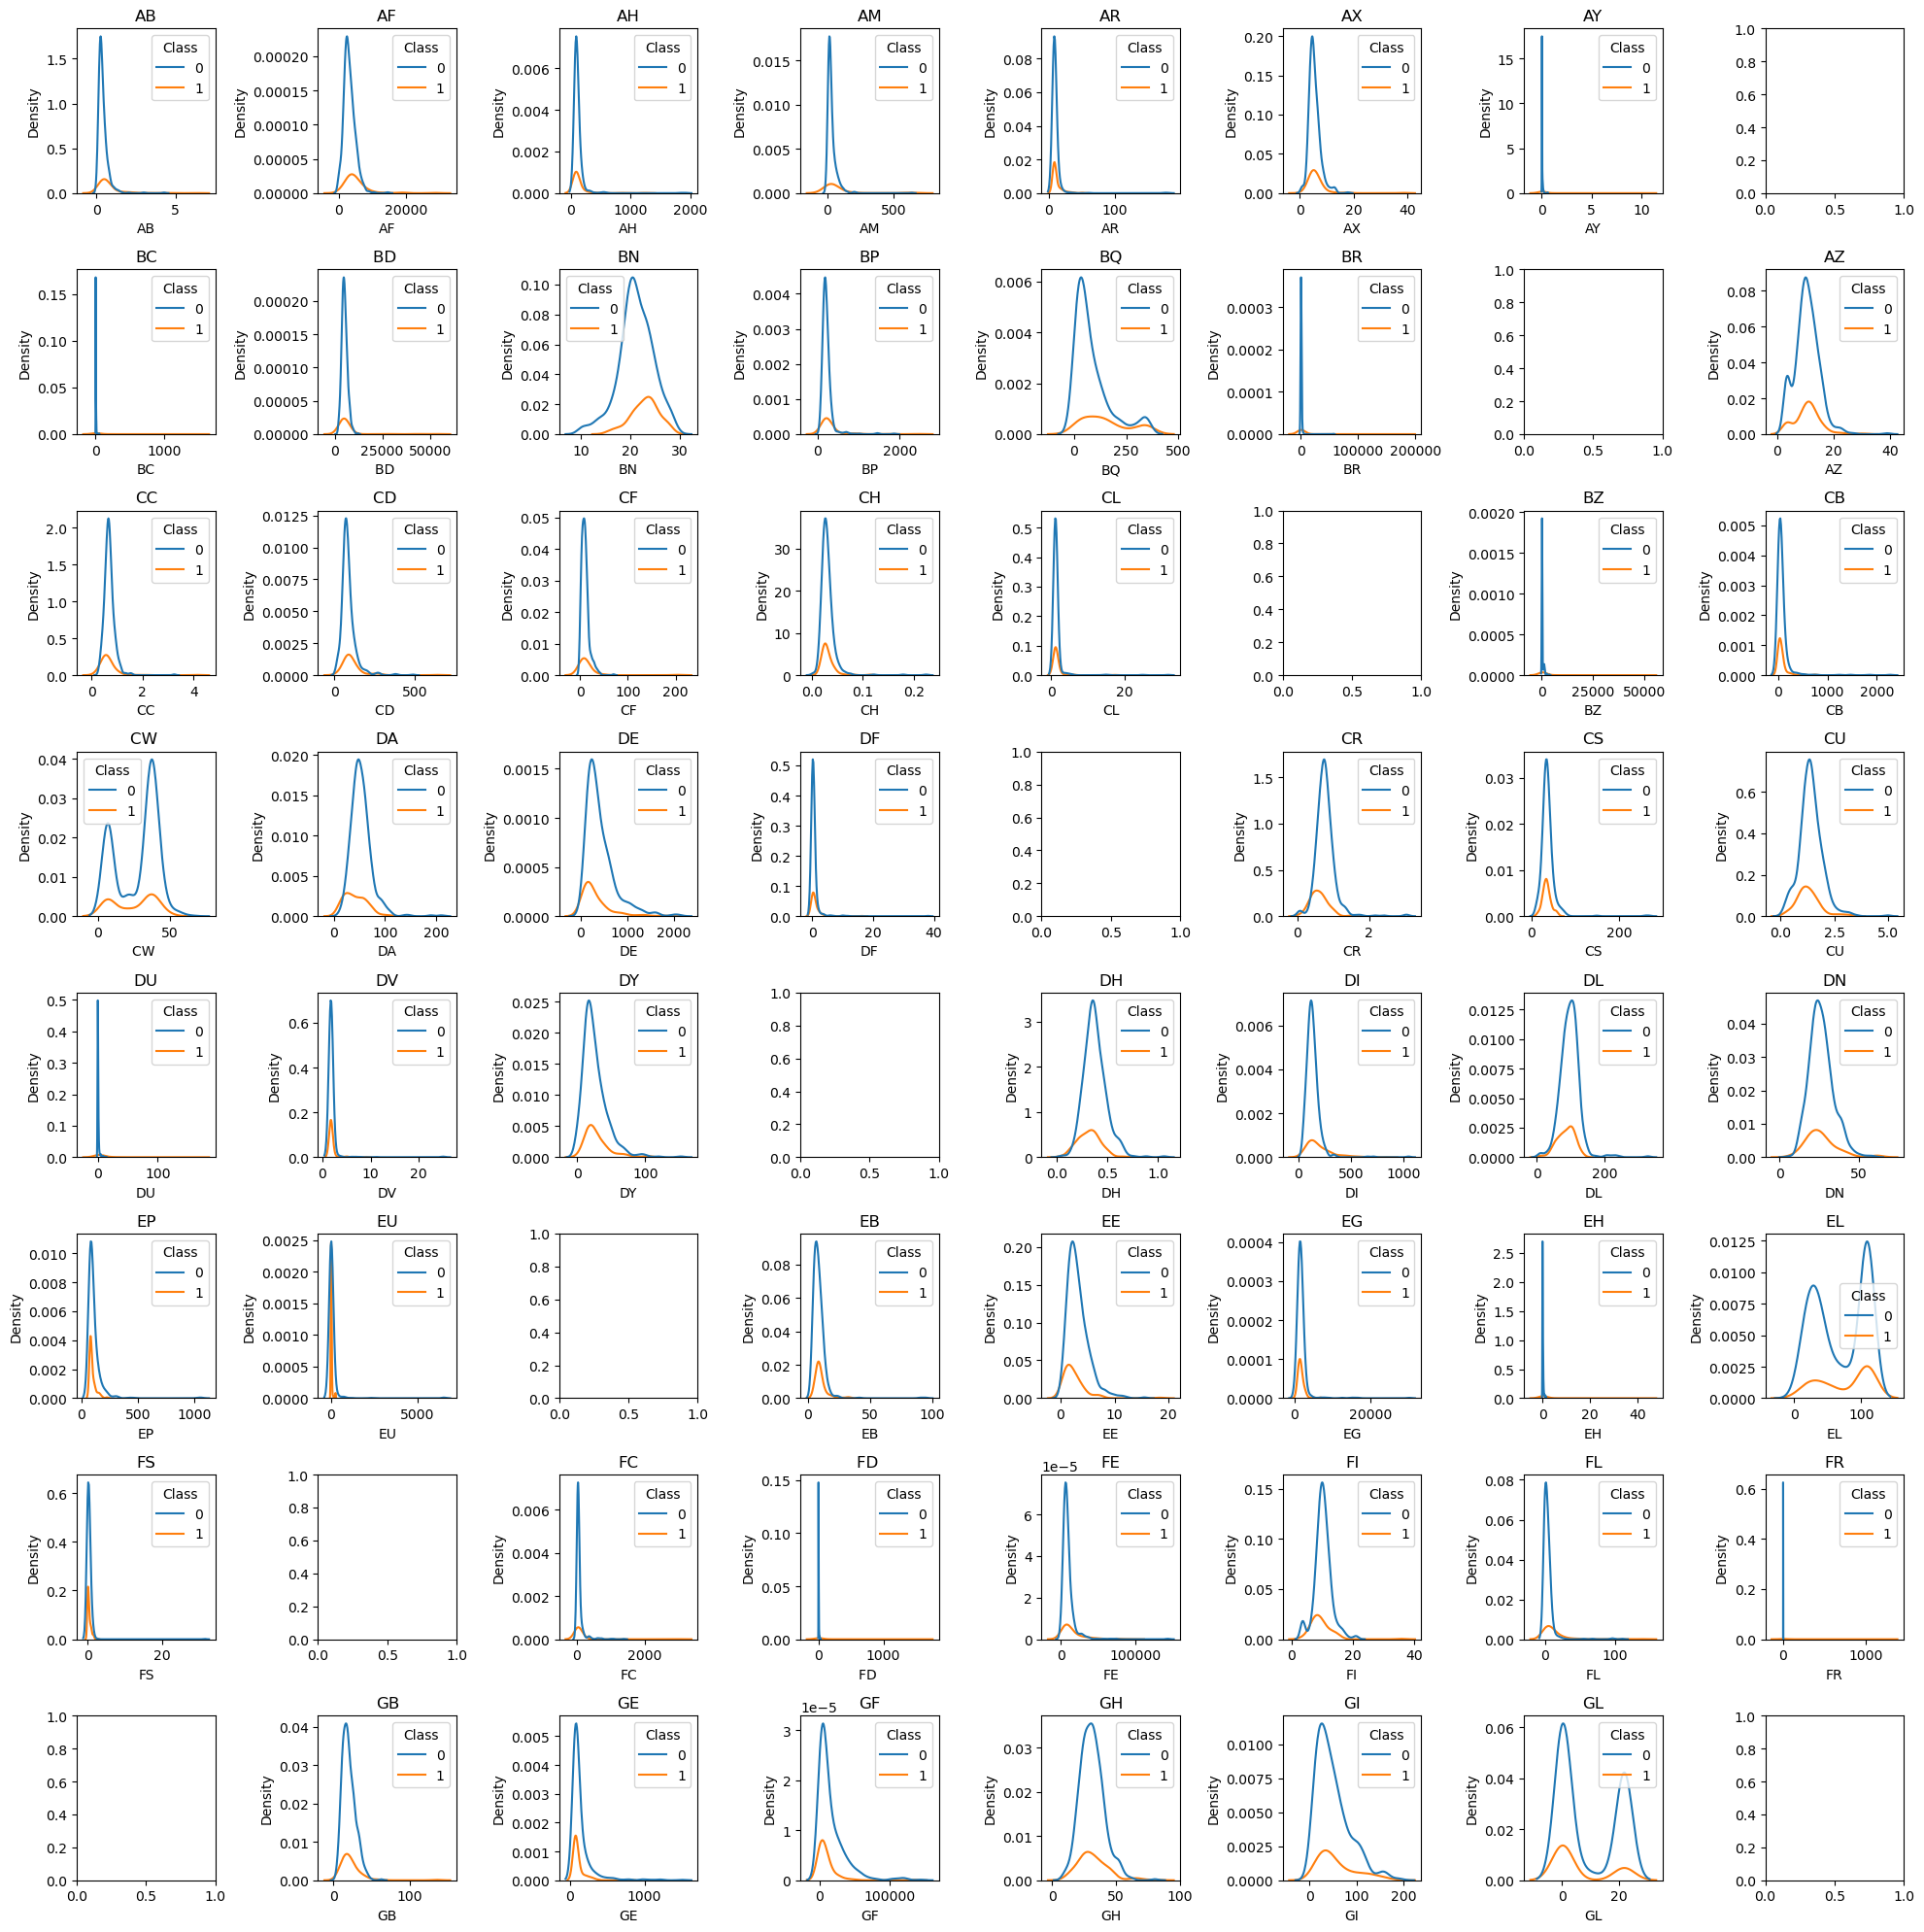

In [11]:
fig,axs=plt.subplots(8,8, figsize=(20,20))  #taking  bigger grid
for i, col in enumerate(numerical_f):
    row_index = i // 7
    col_index = i % 8
    
    sns.kdeplot(data=data, x=data[col], hue=data['Class'], ax=axs[row_index, col_index])
    axs[row_index, col_index].set_title(col)
plt.tight_layout()

The magnitude of the attributes varies a lot and most of the distributions are right-skewed, while the distribution of BN is left-skewed and GL,EL,CW have a density that is bimodal. I will apply a logarithimic transformation to make them more uniform. Almost all the attributes present outlier values.

Outliers detection: I compute the IQR and check for all the values of a feature if they fall in (q1-1.5*IQR,q3+1.5*IQR) or not (-> outlier value)

In [86]:
def get_outliers(c):
    "Function that returns outlier values of a given column s"
    q1 = np.nanpercentile(c, 25) #first quartile.
    q3 = np.nanpercentile(c, 75) #second quartile.
    iqr = (q3 - q1)  #inter quartile range.
    outliers=[el for el in c if (el < q1 - 1.5 * iqr) or (el > q3 + 1.5 * iqr)]
    return outliers
outliers={}
for col in data.columns:
    if(col=="Id" or col=='Class' or col=='EJ'):
        continue
    outliers[col]=get_outliers(data[col]) #the list contains the name of the columns with outlier values and the outlier values 

In [88]:
no_outliers=[col for col in outliers.keys() if len(outliers[col])==0]
print("Columns without outliers: ", no_outliers)
print("Number of columns with outliers (among numerical ones): ", len(outliers)-len(no_outliers),"/",len(data.columns)-3)

Columns without outliers:  ['CW ', 'EL', 'GL']
Number of columns with outliers (among numerical ones):  52 / 55


Most of the columns have outlier values, only 3 don't have them.

In [89]:
for col in no_outliers:
    print(col, " range: ", data[col].min(), data[col].max())

CW   range:  7.03064 64.521624
EL  range:  5.394675 109.125159
GL  range:  0.001129278 21.978


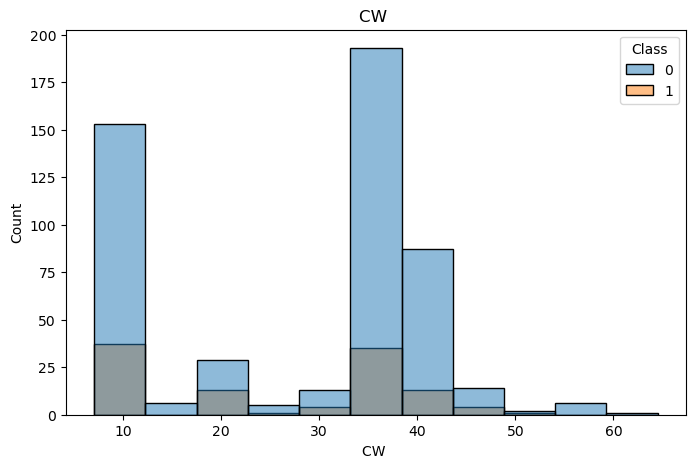

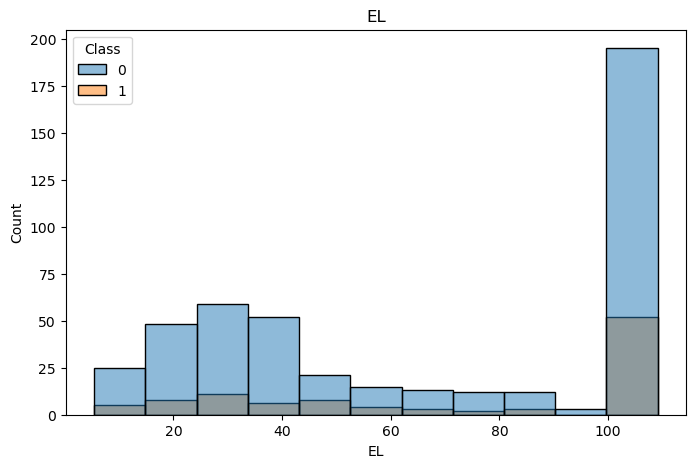

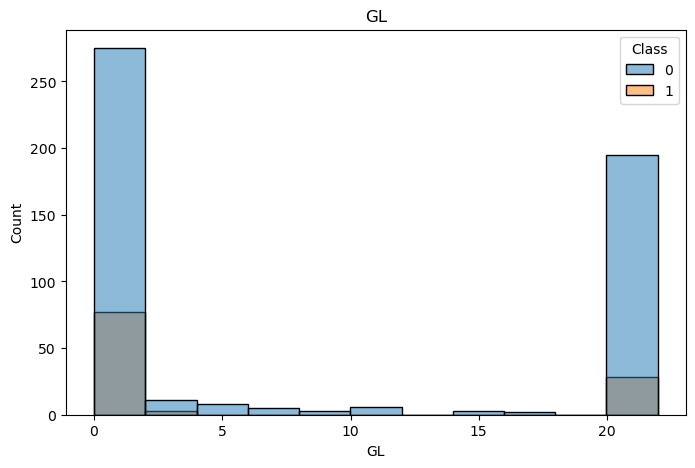

In [31]:
for numf in no_outliers:
    fig, axes = plt.subplots(1, 1, figsize=(8, 5))
    sns.histplot(ax=axes, x=data[numf], hue=data.Class)
    axes.set_title(numf)

# Correlation between attributes

<AxesSubplot:>

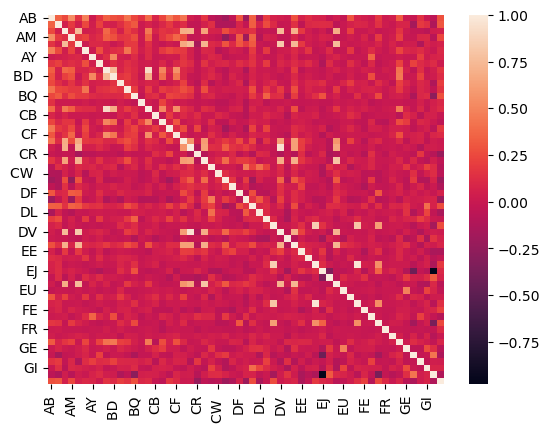

In [69]:
corr=data.corr()
sns.heatmap(corr)

Correlation with target:

<AxesSubplot:>

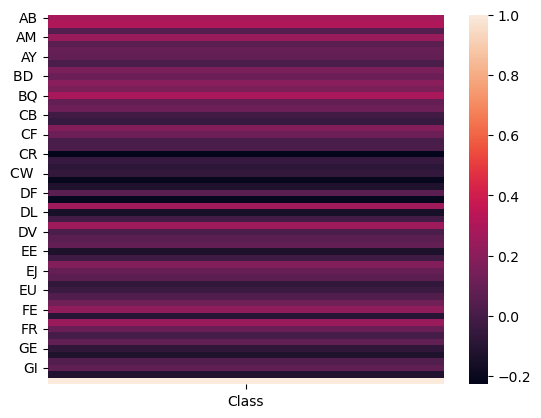

In [70]:
sns.heatmap(data.corr().loc[:,['Class']])

# Transforming the only categorical variable

The feature EJ is binary, therefore I choose to one-hot encode it. This transformation can be done before splitting the data into train and test set because every row is transformed independently from the other ones.

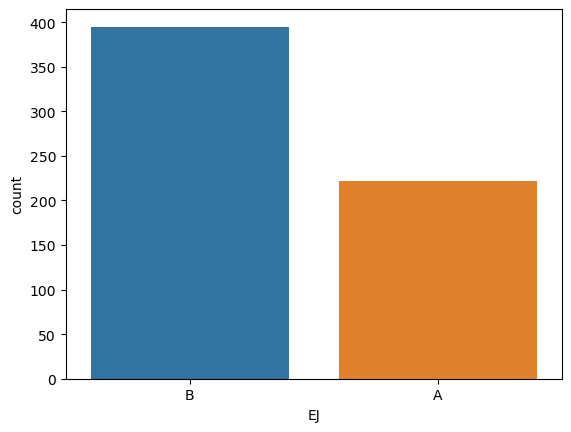

In [6]:
sns.countplot(x='EJ', data=data);

In [9]:
data['EJ'] = data['EJ'].map({'A':0,'B':1})

Saving the data:

In [10]:
data.drop(['Id'], axis=1).to_csv("Train_set_halfprep.csv", index=False)